In [2]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential    # Importing Sequential Model
from keras.layers.core import Dense,Dropout, Activation  #  Importing  Dense Layers,Dropouts and Activation functions
from keras.optimizers import RMSprop, Adam
from keras.utils import np_utils  
np.random.seed(1671) # for reproducibility -> Once you put the same seed you get same patterns of random numbers.
import matplotlib.pyplot as plt

In [3]:
# network and training
NB_EPOCH = 20  # 20-> times the model is exposed to the training set.
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = Adam()
N_HIDDEN = 128 # Neurons
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3

In [14]:
# Data: shuffled and split between train and test sets

(X_train, y_train_label), (X_test, y_test_label) = mnist.load_data()

#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
print(X_train.shape)


(60000, 28, 28)


In [ ]:
RESHAPED = 784
X_train = X_train.reshape(60000, RESHAPED)
X_test  =  X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [5]:
# normalize -> Involve only rescaling to arrive at value relative to some size variables.

X_train /= 255 # Pixel values are 0 to 255 -> So we are normalizing training data by dividing it by 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [6]:
# convert class vectors to binary class matrices
Y_train_label = np_utils.to_categorical(y_train_label, NB_CLASSES) 
Y_test_label = np_utils.to_categorical(y_test_label, NB_CLASSES)

# np_utils.to_categorical Used to convert the array of labelled data to one Hot vector-> Binarization of category

In [7]:
# Final hidden layer  with 10 outputs
# final stage is softmax
model = Sequential() # Sequential Model.
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,))) # 1st Hidden Layer --> 128 neurons and input dimension ->784
model.add(Activation('relu')) # Activation function for 1st Hidden Layer
model.add(Dropout(DROPOUT))

model.add(Dense(N_HIDDEN))  # 2nd Hidden Layer --> 128 neurons
model.add(Activation('relu')) # Activation function for 2nd Hidden Layer
model.add(Dropout(DROPOUT))


model.add(Dense(NB_CLASSES)) # Final layer with 10 neurons == > no of outputs
model.add(Activation('softmax')) # Final layer activation will be 'softmax'

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
__________

In [8]:
# Compiling a model in keras
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [9]:
# Training a model in keras

# Once the model is compiled it can be trained with the fit() function

history = model.fit(X_train, Y_train_label,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 60us/step - loss: 0.5194 - acc: 0.8429 - val_loss: 0.1885 - val_acc: 0.9426
Epoch 2/20
48000/48000 [==============================] - 3s 53us/step - loss: 0.2339 - acc: 0.9298 - val_loss: 0.1424 - val_acc: 0.9569
Epoch 3/20
48000/48000 [==============================] - 2s 46us/step - loss: 0.1812 - acc: 0.9465 - val_loss: 0.1174 - val_acc: 0.9648
Epoch 4/20
48000/48000 [==============================] - 3s 53us/step - loss: 0.1541 - acc: 0.9540 - val_loss: 0.1094 - val_acc: 0.9676
Epoch 5/20
48000/48000 [==============================] - 2s 51us/step - loss: 0.1317 - acc: 0.9597 - val_loss: 0.0987 - val_acc: 0.9703
Epoch 6/20
48000/48000 [==============================] - 2s 47us/step - loss: 0.1184 - acc: 0.9634 - val_loss: 0.0901 - val_acc: 0.9741
Epoch 7/20
48000/48000 [==============================] - 2s 51us/step - loss: 0.1061 - acc: 0.9674 - val_loss: 0.0889 - val_acc

- When Training end we achieve <b>98.13</b>--><b>Accuracy on Training</b>
- <b>97.84</b>--><b>Accuracy on Validataion</b>

In [10]:
# Finally calucating the score.
score = model.evaluate(X_test, Y_test_label, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 38us/step
Test score: 0.0774417163745
Test accuracy: 0.9791


We tested our model with <b>Test dataset</b> and achieved accuracy of <b>98.01</b>

In [11]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


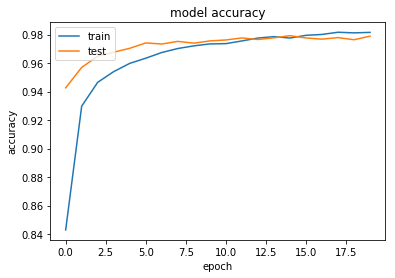

In [12]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

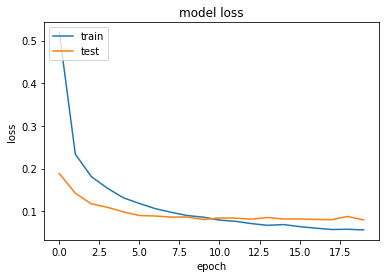

In [13]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()